In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris #importing iris dataset from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
iris=load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

###### We now obtain desription

In [6]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
data=iris.data
type(data)

numpy.ndarray

In [29]:
data.shape

(178, 13)

In [10]:
data=pd.DataFrame(data=data, columns=iris.feature_names)

In [11]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
data['class']=iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Understand your data

In [13]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

## Data Visualisation and feature selection

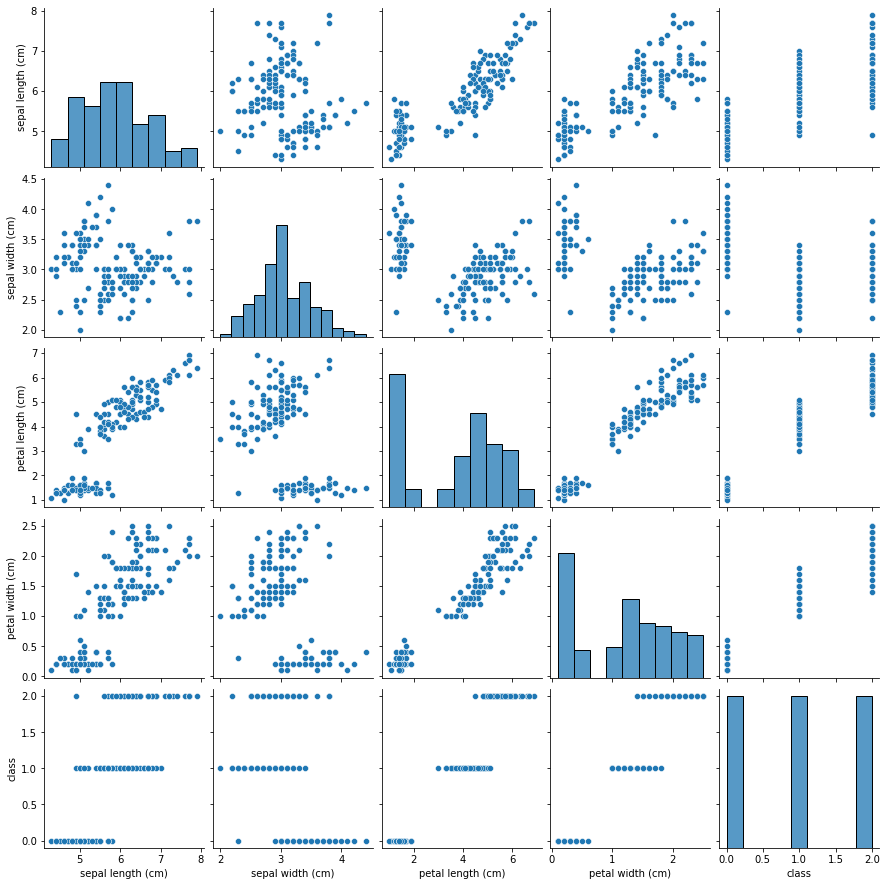

In [16]:
sns.pairplot(data)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

IndexError: index 5 is out of bounds for axis 0 with size 5

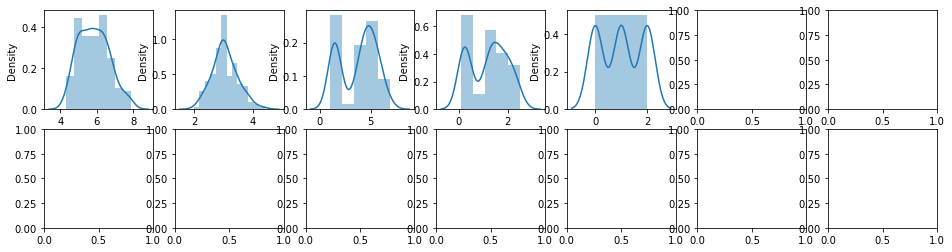

In [17]:
rows=2
cols=7
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(16,4))
col=data.columns   #14 It will be list
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [18]:
corrmat=data.corr() # to show correlation between two variables
corrmat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

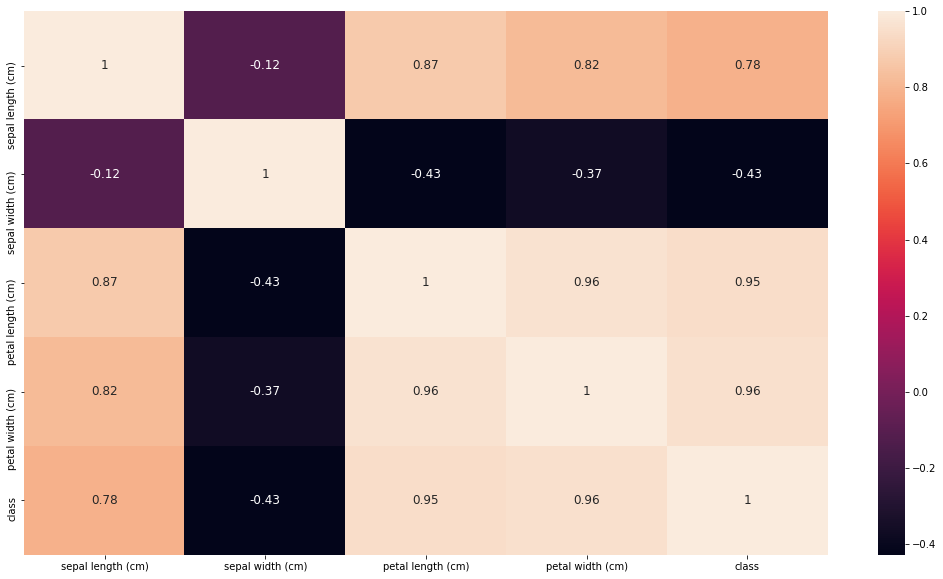

In [19]:
fig, ax=plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size':12})

In [20]:
corrmat.index

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [21]:
corrmat.index.values

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'], dtype=object)

In [22]:
def getCorrelatedFeature(corrdata, threshold):
    feature=[]
    value=[]
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df

In [23]:
threshold=0.50
corr_value=getCorrelatedFeature(corrmat['class'],threshold)
corr_value

,Corr Value
sepal length (cm),0.782561
petal length (cm),0.949035
petal width (cm),0.956547
class,1.000000


In [24]:
corr_value.index.values

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)',
       'class'], dtype=object)

In [25]:
correlated_data=data[corr_value.index]
correlated_data.head()

,sepal length (cm),petal length (cm),petal width (cm),class
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


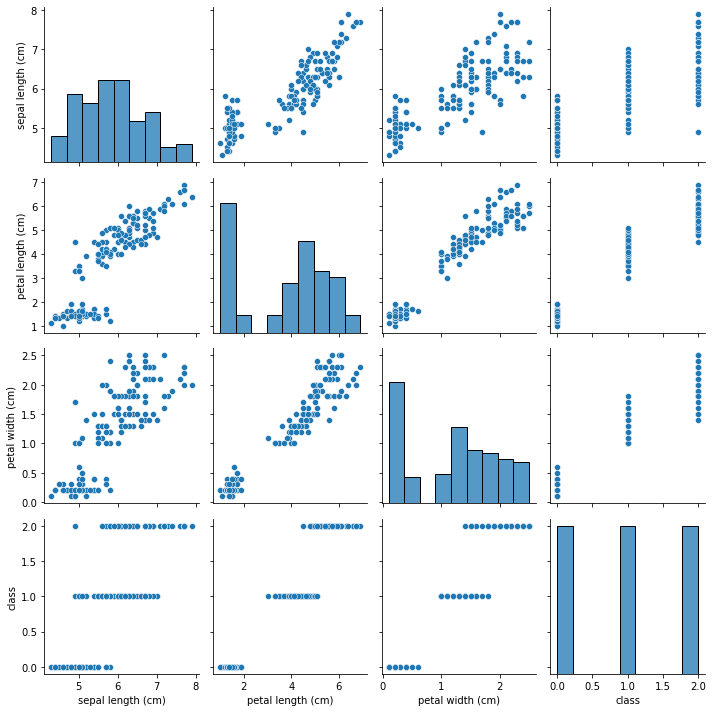

In [26]:
sns.pairplot(correlated_data)
plt.tight_layout()

<AxesSubplot:>

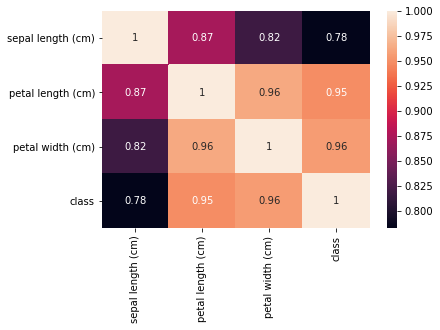

In [27]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'size':10})

## shuffle and split the data

In [28]:
X=correlated_data.drop("class",axis=1)
y=correlated_data["class"]
X.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train.shape, X_test.shape #number of data left to train and test the model repectively

((120, 3), (30, 3))

## Train the Model 

In [31]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_predict=model.predict(X_test)

In [33]:
y_predict

array([ 2.06423389,  0.93621122, -0.12571886,  1.81720808, -0.03474229,
        2.28474989, -0.02642721,  1.31529157,  1.26856934,  1.09960285,
        1.56268416,  1.30418906,  1.21761172,  1.31631149,  1.33530104,
       -0.10570939,  1.35675848,  1.22067148,  0.02512229, -0.02015197,
        1.80461038,  1.4093279 ,  0.09260158,  0.01884705,  1.58280213,
       -0.10849682,  0.17086384,  1.16225486,  0.89078124,  0.10821182])

In [34]:
df=pd.DataFrame(data=[y_predict,y_test])
df.T

,0,1
0,2.064234,2.0
1,0.936211,1.0
2,-0.125719,0.0
3,1.817208,2.0
4,-0.034742,0.0
5,2.284750,2.0
6,-0.026427,0.0
7,1.315292,1.0
8,1.268569,1.0
9,1.099603,1.0


In [35]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print("R2 Score:", score)    #the variation our model can hold more the better
print("MAE:", mae)     #mean absolute error
print("MSE", mse)    # mean square error

R2 Score: 0.9051568893487415
MAE: 0.18658231774820305
MSE 0.05110989851762263
